<a href="https://colab.research.google.com/github/123shwetarohokale/563-ShwetaR/blob/main/Practice%20MC%20sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

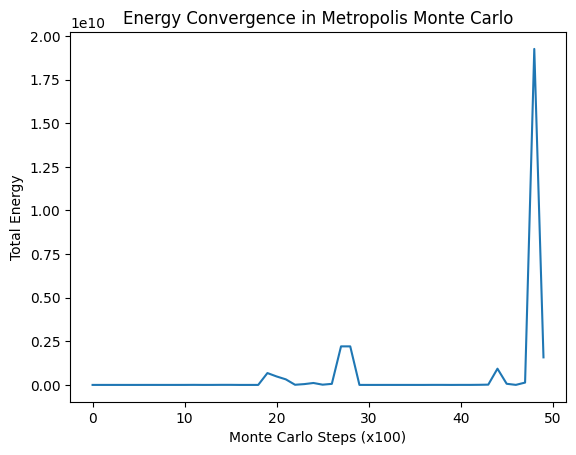

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Lennard-Jones Potential Function
def lj_potential(r, epsilon=1.0, sigma=1.0):
    """Computes Lennard-Jones potential."""
    r6 = (sigma / r) ** 6
    r12 = r6 ** 2
    return 4 * epsilon * (r12 - r6)

# Minimum image convention for periodic boundary conditions
def minimum_image(rij, box_size):
    return rij - box_size * np.round(rij / box_size)

# Compute total energy of the system
def total_energy(positions, box_size, epsilon=1.0, sigma=1.0):
    """Computes total potential energy of the system."""
    N = len(positions)
    energy = 0.0
    for i in range(N):
        for j in range(i + 1, N):
            rij = minimum_image(positions[i] - positions[j], box_size)
            r = np.linalg.norm(rij)
            if r < box_size / 2:  # Cutoff to avoid unnecessary computations
                energy += lj_potential(r, epsilon, sigma)
    return energy

# Monte Carlo Move
def monte_carlo_step(positions, box_size, epsilon=1.0, sigma=1.0, max_displacement=0.1, beta=1.0):
    """Performs a single Monte Carlo step (random displacement)."""
    N = len(positions)
    i = np.random.randint(N)  # Select a random particle
    new_pos = positions[i] + np.random.uniform(-max_displacement, max_displacement, 3)  # Random move
    new_pos = new_pos % box_size  # Apply periodic boundary conditions

    # Compute energy change
    old_energy = total_energy(positions, box_size, epsilon, sigma)
    positions[i] = new_pos  # Temporarily move particle
    new_energy = total_energy(positions, box_size, epsilon, sigma)

    delta_E = new_energy - old_energy

    # Metropolis acceptance rule
    if delta_E > 0 and np.random.rand() > np.exp(-beta * delta_E):
        positions[i] -= new_pos - positions[i]  # Reject move, revert position

    return positions

# Main Monte Carlo Simulation
def metropolis_mc(N=100, box_size=10.0, epsilon=1.0, sigma=1.0, max_displacement=0.1, beta=1.0, steps=10000):
    """Performs a Monte Carlo simulation using the Metropolis algorithm."""
    positions = np.random.uniform(0, box_size, (N, 3))  # Initialize random positions
    energies = []

    for step in range(steps):
        positions = monte_carlo_step(positions, box_size, epsilon, sigma, max_displacement, beta)
        if step % 100 == 0:
            energies.append(total_energy(positions, box_size, epsilon, sigma))

    return positions, np.array(energies)

# Run Simulation
N = 100  # Number of particles
box_size = 10.0  # Box dimension
beta = 1.0 / 1.5  # Inverse temperature (1/kT)
steps = 5000  # Total Monte Carlo steps

final_positions, energy_evolution = metropolis_mc(N=N, box_size=box_size, beta=beta, steps=steps)

# Plot Energy Convergence
plt.plot(energy_evolution)
plt.xlabel("Monte Carlo Steps (x100)")
plt.ylabel("Total Energy")
plt.title("Energy Convergence in Metropolis Monte Carlo")
plt.show()